In [113]:
## importing necessary liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

# import dataset

In [2]:
data=pd.read_csv(r"C:\Users\pv11379\Downloads/framingham.csv")

In [3]:
## copy data to datframe
df=data.copy()
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
## bottom five rows
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [5]:
## index of dataset
df.index

RangeIndex(start=0, stop=4238, step=1)

In [6]:
## shape of dataset
print("Total rows are - ",df.shape[0])
print("Total columns are - ",df.shape[1])

Total rows are -  4238
Total columns are -  16


## datatype of dataset features

In [7]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [8]:
## information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


## unique values in dataset

In [9]:
df.nunique()

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             248
sysBP               234
diaBP               146
BMI                1363
heartRate            73
glucose             143
TenYearCHD            2
dtype: int64

## null values in dataset

In [10]:
df.isna().any()

male               False
age                False
education           True
currentSmoker      False
cigsPerDay          True
BPMeds              True
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol             True
sysBP              False
diaBP              False
BMI                 True
heartRate           True
glucose             True
TenYearCHD         False
dtype: bool

In [11]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

## all null values columns are int or float datatype, so i will fill null values with median.
## check median of null values column

In [12]:
print(df['education'].median())
print(df['cigsPerDay'].median())
print(df['BPMeds'].median())
print(df['totChol'].median())
print(df['BMI'].median())
print(df['glucose'].median())
print(df['heartRate'].median())

2.0
0.0
0.0
234.0
25.4
78.0
75.0


## fill NAN with its median values

In [13]:
df['education'].fillna(2,inplace=True)
df['cigsPerDay'].fillna(0,inplace=True)
df['BPMeds'].fillna(0,inplace=True)
df['totChol'].fillna(234,inplace=True)
df['BMI'].fillna(25.4,inplace=True)
df['glucose'].fillna(78,inplace=True)
df['heartRate'].fillna(75,inplace=True)

In [14]:
## now verify NAN in dataset
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

## statistical details of dataset

In [15]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,49.584946,1.979471,0.494101,8.941482,0.029259,0.005899,0.310524,0.025720,236.689476,132.352407,82.893464,25.800205,75.878716,81.603587,0.151958
std,0.495022,8.572160,1.007081,0.500024,11.902399,0.168552,0.076587,0.462763,0.158316,44.327427,22.038097,11.910850,4.071041,12.025185,22.865246,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.875000,28.037500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [16]:
##columns in dataset
col=df.columns
col

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

## outliers in dataset

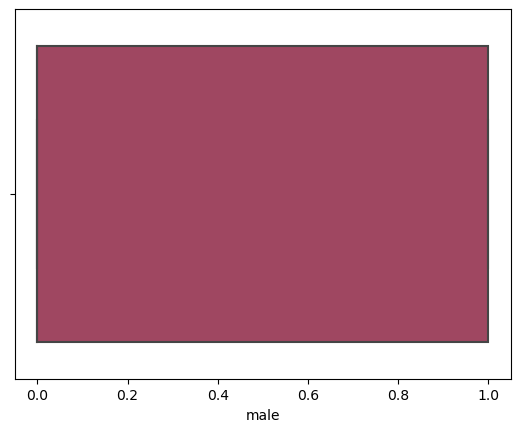

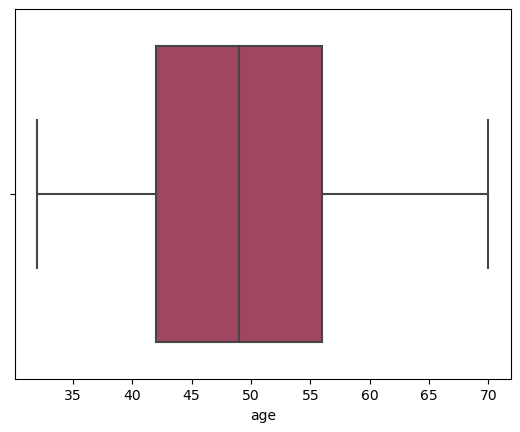

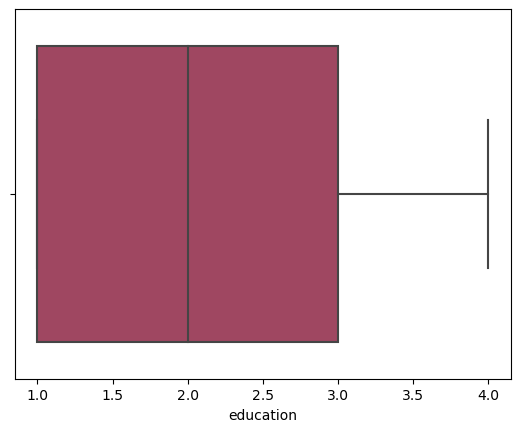

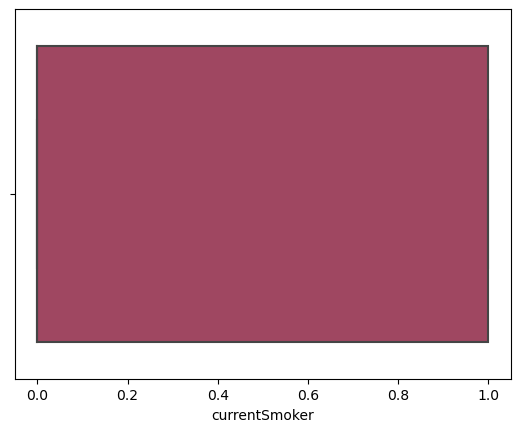

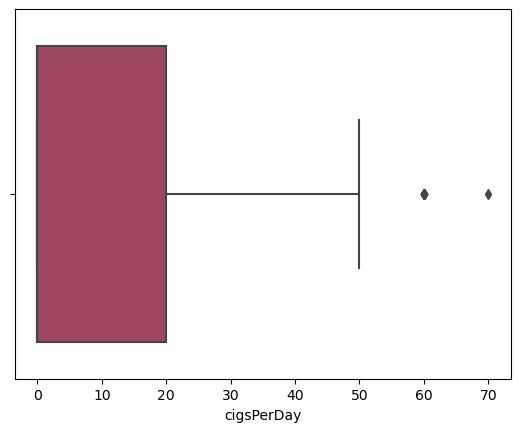

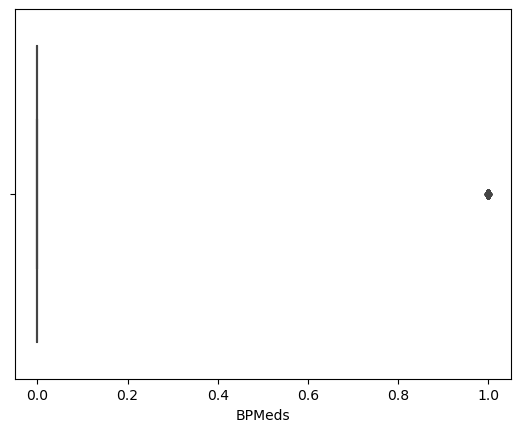

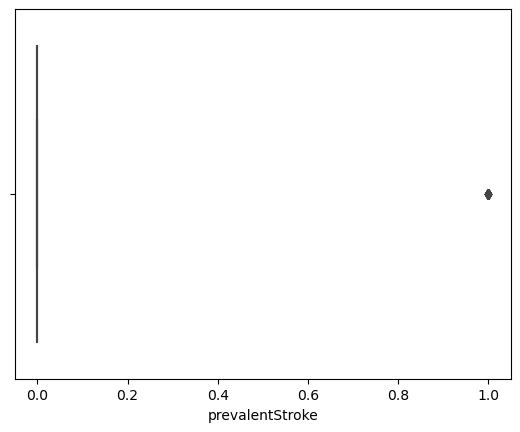

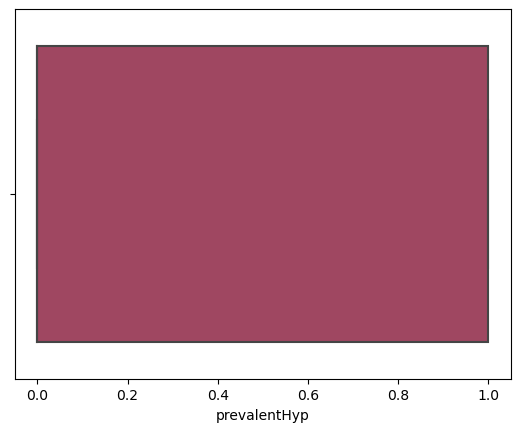

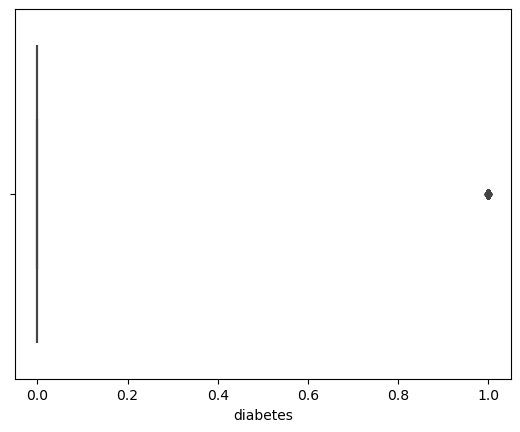

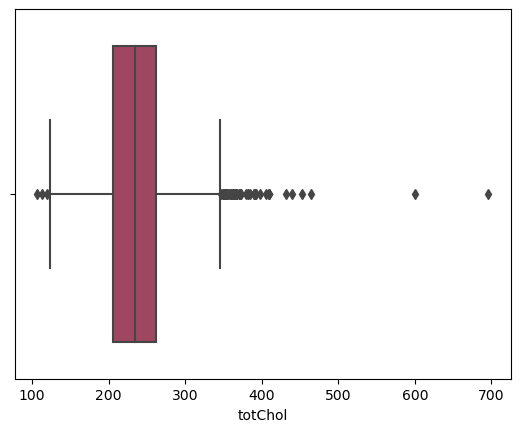

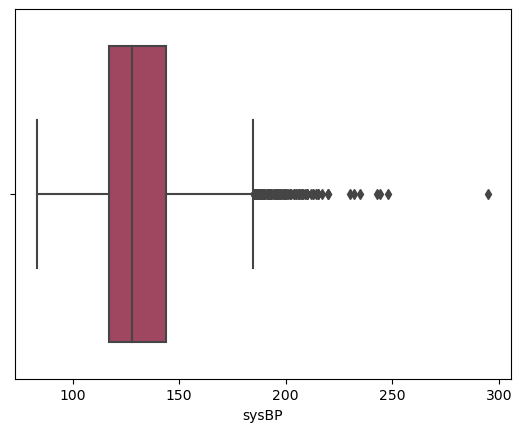

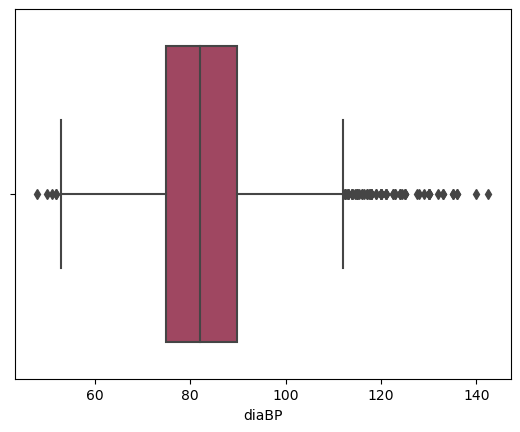

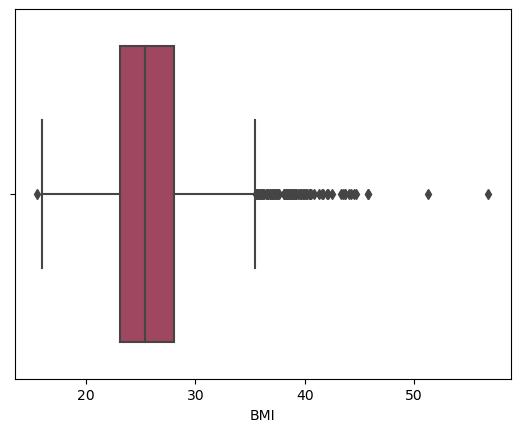

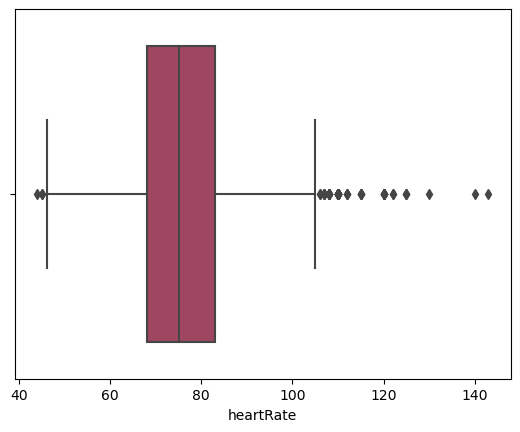

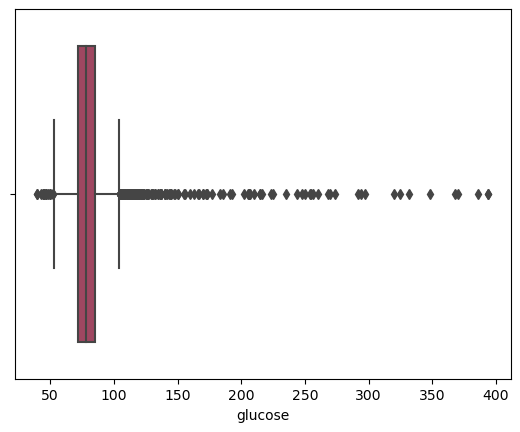

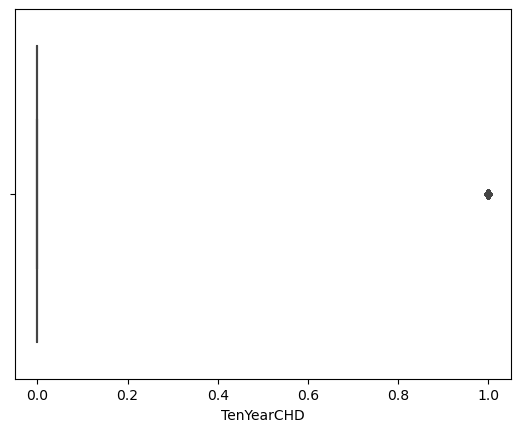

In [17]:
for i in col:
    plt.figure()
    sns.boxplot(x=df[i],palette="rocket",saturation=0.5)

## process on outliers

In [18]:
col=df[['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [19]:
for i in col:
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    iqr=q3-q1
    lower_fense=q1-1.5*(iqr)
    higher_fense=q3+1.5*(iqr)
    df[i]=np.where(df[i]<lower_fense,lower_fense,df[i])
    df[i]=np.where(df[i]>higher_fense,higher_fense,df[i])

In [20]:
column=df.columns
column

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

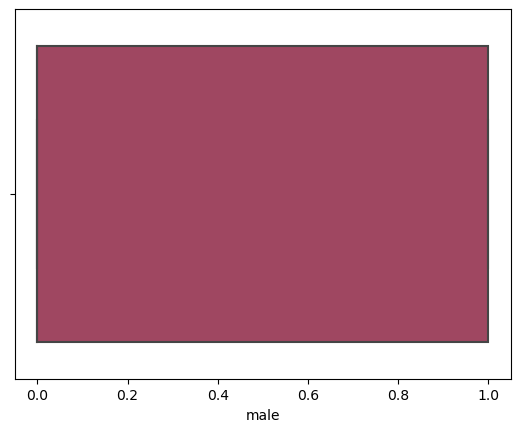

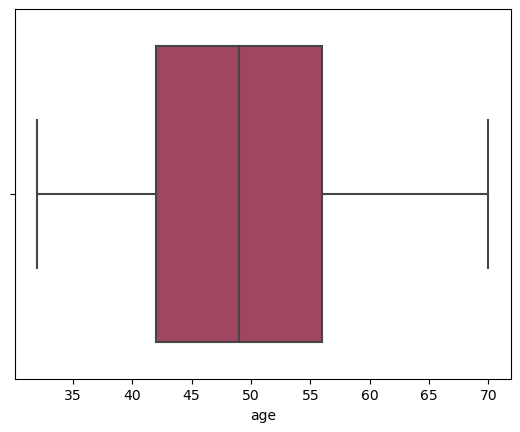

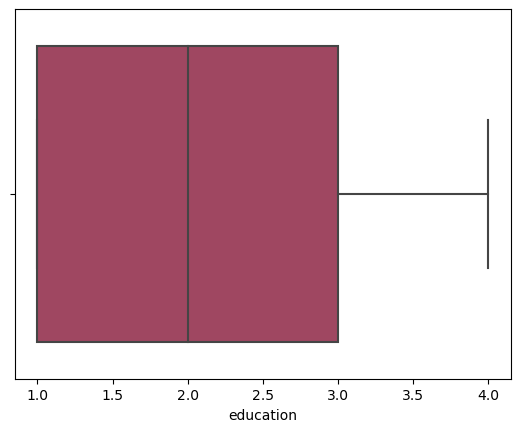

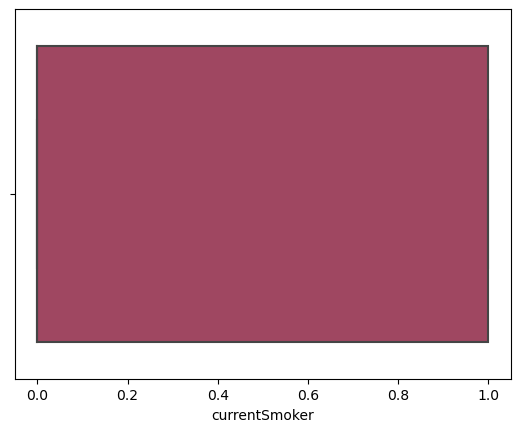

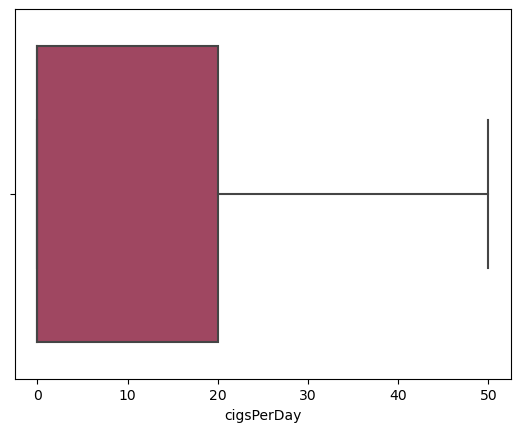

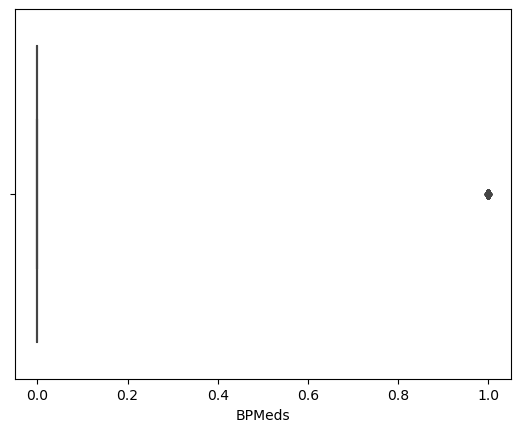

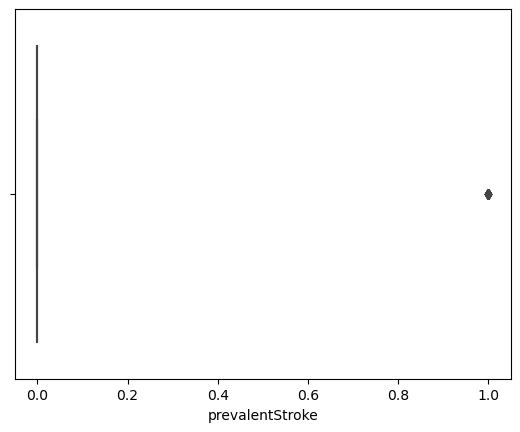

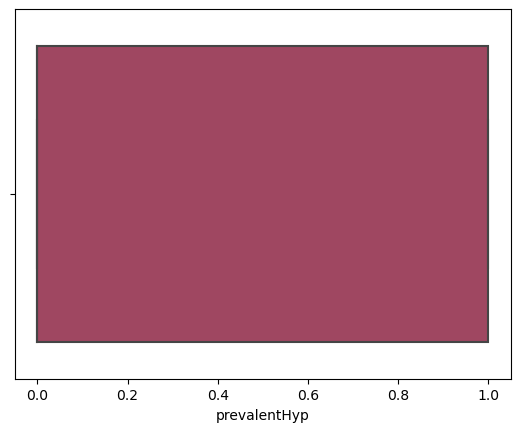

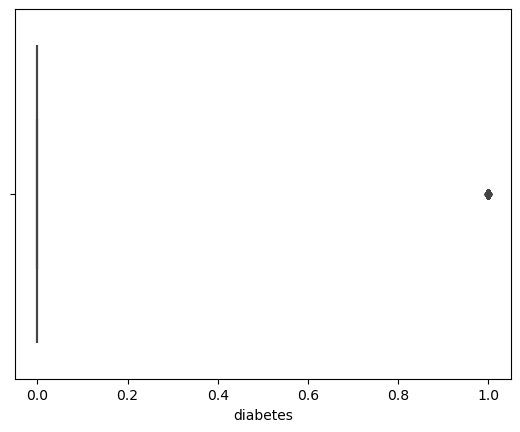

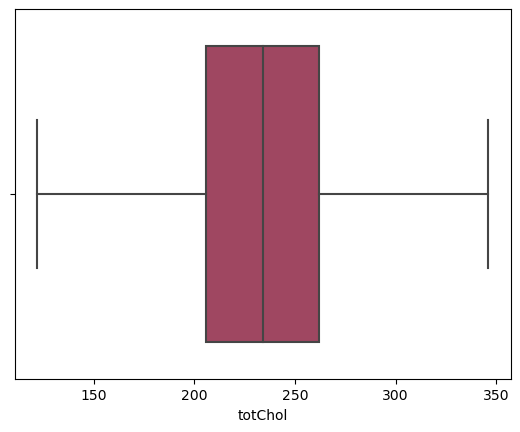

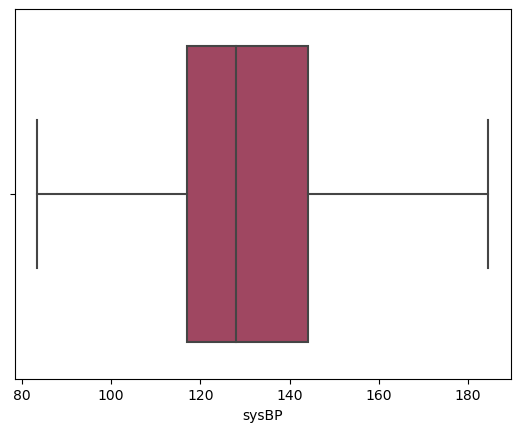

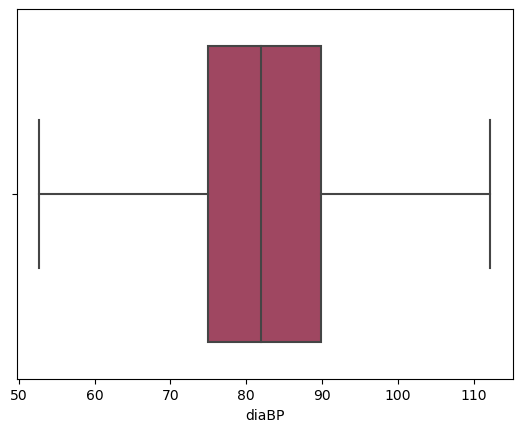

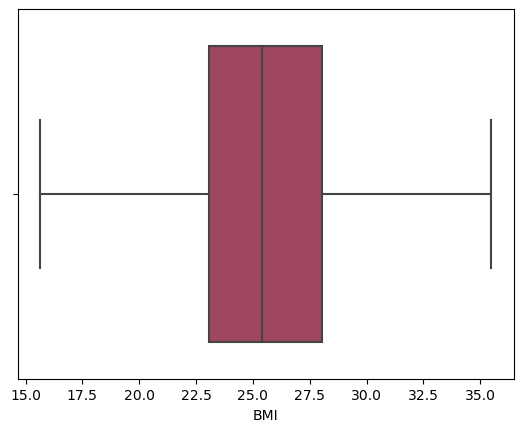

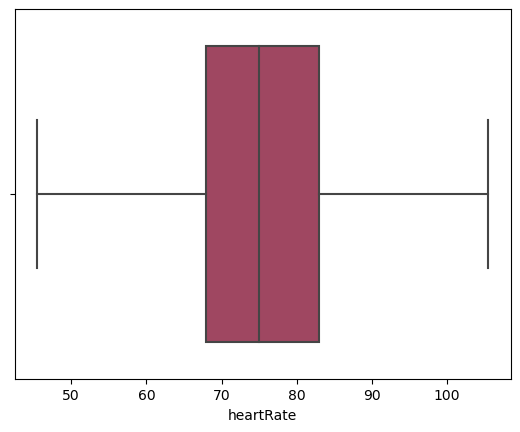

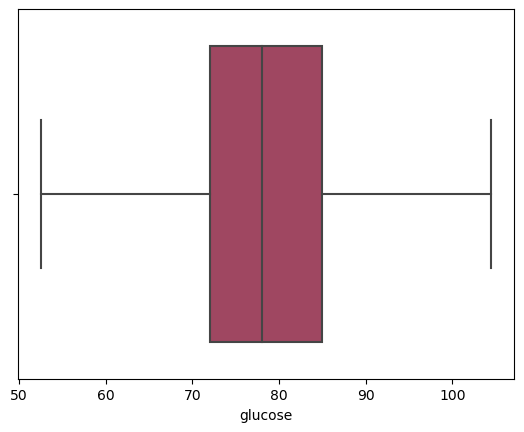

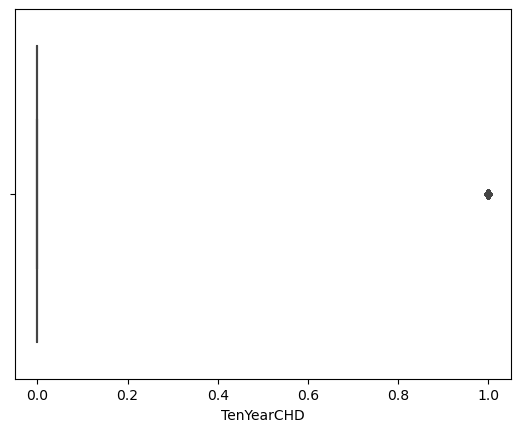

In [21]:
for p in column:
    plt.figure()
    sns.boxplot(x=df[p],palette="rocket",saturation=0.5)

## Now no outliers in dataset.

# correlation in dataset

In [22]:
correlation= df.drop(['BPMeds','prevalentStroke','diabetes','TenYearCHD'],axis=1)
corr=correlation.corr
corr()

,male,age,education,currentSmoker,cigsPerDay,prevalentHyp,totChol,sysBP,diaBP,BMI,heartRate,glucose
male,1.000000,-0.028979,0.017205,0.197596,0.315879,0.005313,-0.071200,-0.030095,0.063325,0.102312,-0.116487,-0.001098
age,-0.028979,1.000000,-0.163547,-0.213748,-0.193645,0.307194,0.269226,0.397920,0.206682,0.137018,-0.014283,0.120069
education,0.017205,-0.163547,1.000000,0.018273,0.008041,-0.081021,-0.022037,-0.129073,-0.060799,-0.132060,-0.052507,-0.026354
currentSmoker,0.197596,-0.213748,0.018273,1.000000,0.765436,-0.103260,-0.049416,-0.130087,-0.107686,-0.170351,0.066365,-0.066862
cigsPerDay,0.315879,-0.193645,0.008041,0.765436,1.000000,-0.066566,-0.027134,-0.088021,-0.055622,-0.091968,0.077568,-0.080655
prevalentHyp,0.005313,0.307194,-0.081021,-0.103260,-0.066566,1.000000,0.160452,0.713008,0.622958,0.296577,0.147003,0.084638
totChol,-0.071200,0.269226,-0.022037,-0.049416,-0.027134,0.160452,1.000000,0.213093,0.174874,0.130529,0.088335,0.037241
sysBP,-0.030095,0.397920,-0.129073,-0.130087,-0.088021,0.713008,0.213093,1.000000,0.782594,0.319020,0.181762,0.119348
diaBP,0.063325,0.206682,-0.060799,-0.107686,-0.055622,0.622958,0.174874,0.782594,1.000000,0.370262,0.182718,0.051375
BMI,0.102312,0.137018,-0.132060,-0.170351,-0.091968,0.296577,0.130529,0.319020,0.370262,1.000000,0.060968,0.084017


# good and positive correlation features

## currentsmoker with cigsPerDay
## prevalentHyp with sysBP
## sysbp with diaBP

# EDA - Exploratory data analysis

In [23]:
# gender distribution
print("Total males are -",round(df['male'].value_counts(normalize=True)[1]*100),0)
print("Total females are-",round(df['male'].value_counts(normalize=True)[0]*100),0)

Total males are - 43 0
Total females are- 57 0


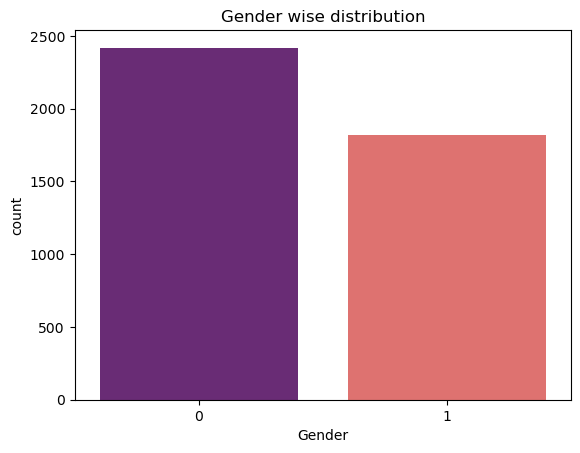

In [24]:
sns.countplot(x=df['male'],palette='magma')
plt.title("Gender wise distribution")
plt.xlabel("Gender")
plt.show()

In [25]:
print("Total heart disease cases are - ",df['TenYearCHD'].value_counts()[1])

Total heart disease cases are -  644


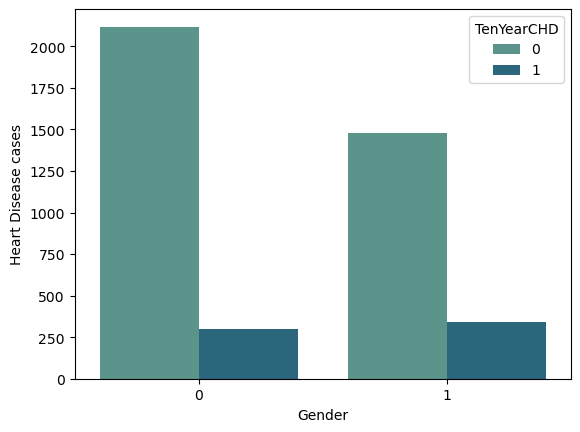

In [26]:
sns.countplot(x=df['male'],hue=df['TenYearCHD'],palette='crest')
plt.ylabel("Heart Disease cases")
plt.xlabel("Gender")
plt.show()

## 301 No's female having 10 year risk of coronary heart disease CHD.
## 343 no's male having 10 year risk of coronary heart disease CHD

In [27]:
gen_chd= round(df[['male','TenYearCHD']].value_counts(normalize=True)*100,0)
pd.DataFrame(gen_chd,columns=['percentage'])

percentage
male TenYearCHD            
0    0                 50.0
1    0                 35.0
     1                  8.0
0    1                  7.0

## 8% male and 7% female having 10 year risk of coronary heart disease CHD
## coronary heart disease in male is more than female.

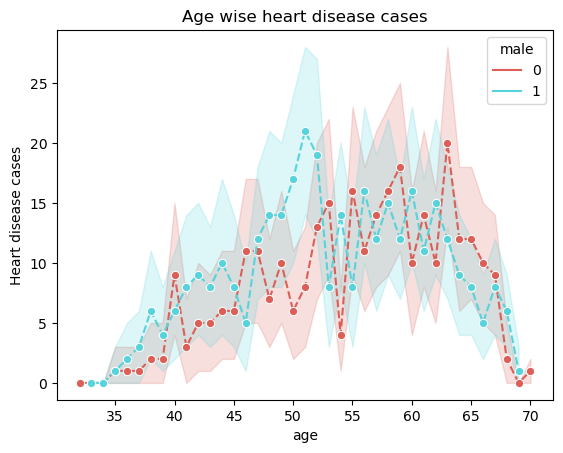

In [28]:
sns.lineplot(data=df,x='age',y='TenYearCHD',estimator=sum,hue='male',linestyle='dashed',marker='o',palette='hls')
plt.title("Age wise heart disease cases")
plt.ylabel("Heart disease cases")
plt.show()

## Male - Max heart disease cases in between 50 to 52 years old.
## Female - Max heart disease cases in between 63 to 64 years old.

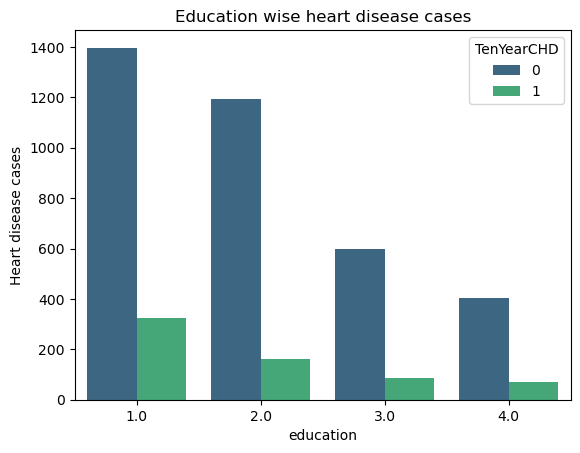

In [29]:
sns.countplot(data=df,x='education',hue='TenYearCHD',palette='viridis')
plt.title("Education wise heart disease cases")
plt.ylabel("Heart disease cases")
plt.show()

In [30]:
round(df[['male','education']].value_counts(normalize=True)*100,0)

male  education
0     1.0          22.0
      2.0          19.0
1     1.0          18.0
      2.0          13.0
0     3.0          11.0
1     4.0           7.0
      3.0           5.0
0     4.0           5.0
dtype: float64

## Education 1.0 having maximum heart disease cases.
## 18% male are in education 1.0

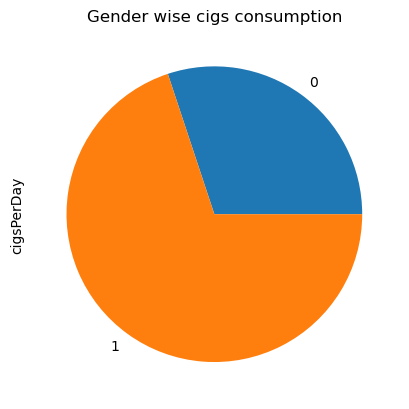

In [31]:
df.groupby('male')['cigsPerDay'].mean().plot(kind='pie')
plt.title("Gender wise cigs consumption")
plt.show()

## Male consumed more cigarret than female.
## average cigarret consumed by male per day is 13 no's.

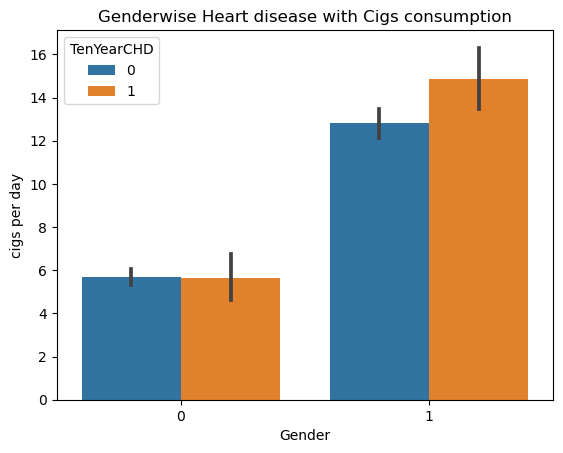

In [32]:
sns.barplot(data=df,y='cigsPerDay',x='male',hue='TenYearCHD')
plt.title("Genderwise Heart disease with Cigs consumption")
plt.ylabel("cigs per day")
plt.xlabel("Gender")
plt.show()

## male heart disease cases consumed more than 14 cigs per day.
## female heart disease cases consumed 6 cigs per day.
## even with less cigs consumption by female, only 1% difference in heart diseases count.
## means cigs affecting more on female than male.

In [33]:
df.groupby('currentSmoker')['TenYearCHD'].sum()

currentSmoker
0    311
1    333
Name: TenYearCHD, dtype: int64

## no major diff in number of cases of current smoker and non current smoker.

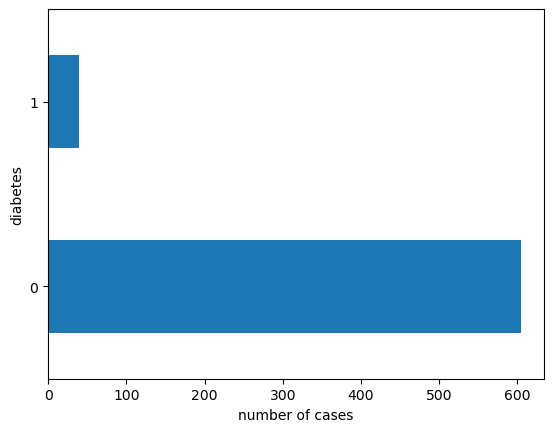

In [34]:
df.groupby('diabetes')['TenYearCHD'].sum().plot(kind='barh')
plt.xlabel("number of cases")
plt.show()

## number of heart disease cases are more in non diabetes patient, so no any correlation between them.

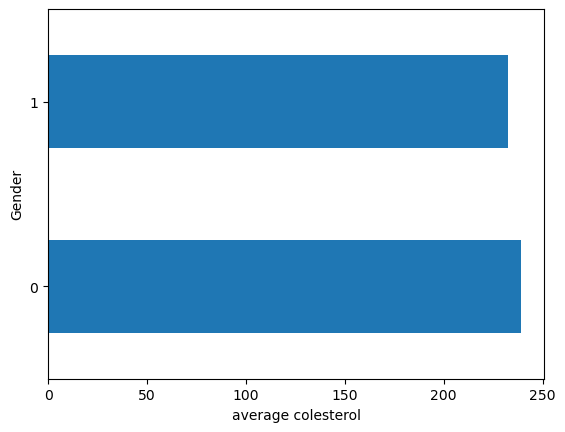

In [35]:
df.groupby('male')['totChol'].mean().plot(kind='barh')
plt.ylabel("Gender")
plt.xlabel("average colesterol")
plt.show()

## no diff in avg colestrol of male and female.

In [36]:
print("average cholesterol of heart cases is - ",round(df.groupby('TenYearCHD')['totChol'].mean()[1],0))

average cholesterol of heart cases is -  244.0


In [37]:
print("average body mass index of heart cases is - ",round(df.groupby('TenYearCHD')['BMI'].mean()[1],0))

average body mass index of heart cases is -  26.0


In [38]:
print("average glucose of heart cases is - ",round(df.groupby('TenYearCHD')['glucose'].mean()[1],0))

average glucose of heart cases is -  81.0


In [39]:
print("average heartRate of heart cases is - ",round(df.groupby('TenYearCHD')['heartRate'].mean()[1],0))

average heartRate of heart cases is -  76.0


In [40]:
print("average sysBP of heart cases is - ",round(df.groupby('TenYearCHD')['sysBP'].mean()[1],0))

average sysBP of heart cases is -  142.0


In [41]:
print("average diaBP of heart cases is - ",round(df.groupby('TenYearCHD')['diaBP'].mean()[1],0))

average diaBP of heart cases is -  87.0


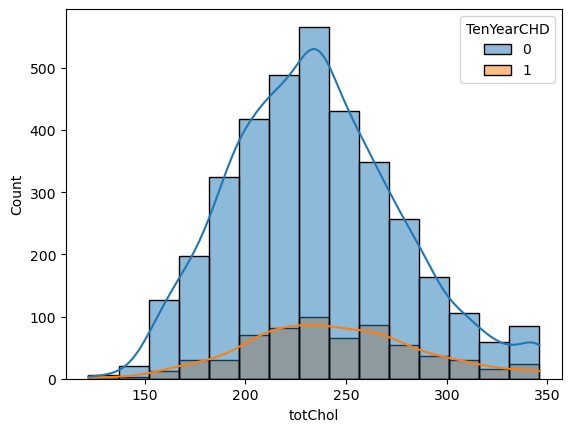

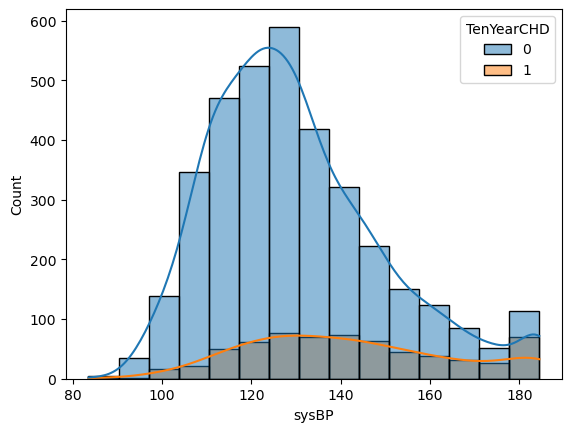

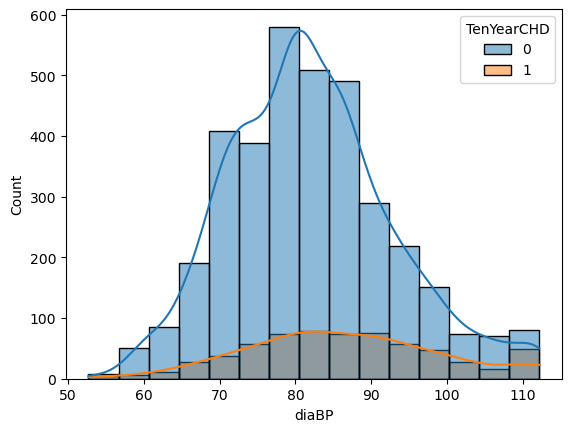

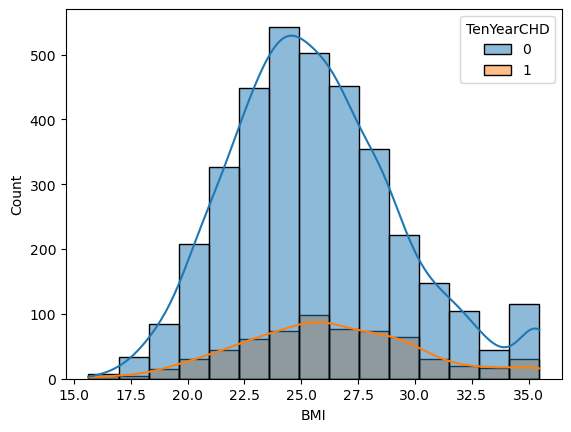

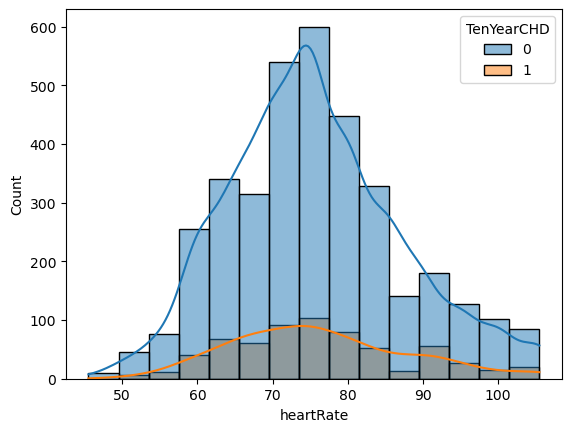

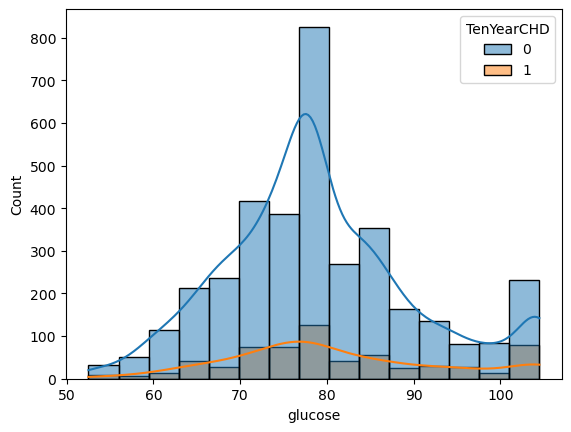

In [42]:
dist=df[['totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]
for i in dist:
    plt.figure()
    sns.histplot(x=dist[i],hue=df['TenYearCHD'],kde=True,bins=15)

## max heart disease cases fall under cholestrol range of 220 to 260.
## Max heart disease cases fall under MBI range 23.5 to 27.5.
## Max heart disease cases fall under sysBP range 125 to 145.
## Max heart disease cases fall under diaBP range 80 to 90.
## max heart disease cases fall under heart rate range 73 to 76.
## max heart disease cases fall under glucose range 78 to 81.

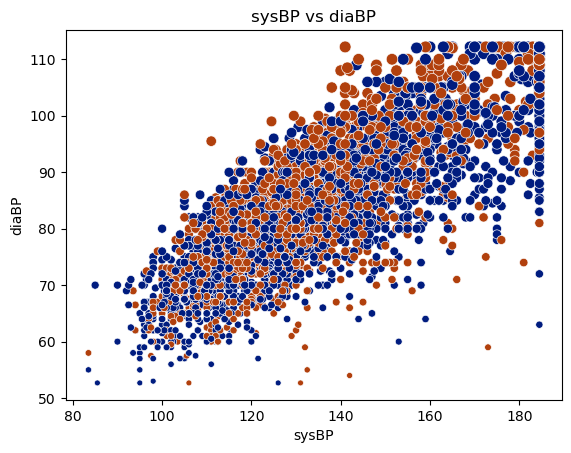

In [43]:
sns.scatterplot(data=df,x='sysBP',y='diaBP',size='diaBP',legend=None,hue='male',palette='dark')
plt.title("sysBP vs diaBP")
plt.show()

## sysBP and diaBP having positive relationship. 

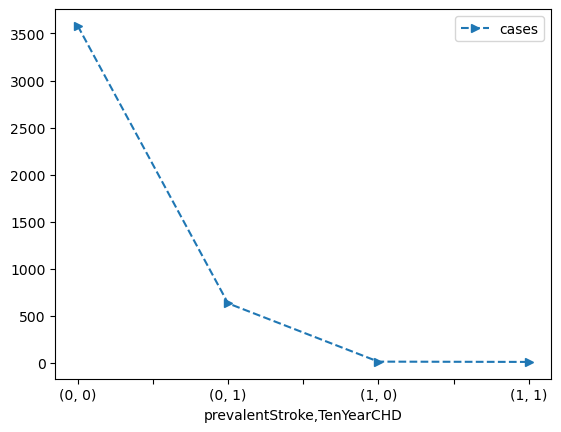

In [44]:
pd.DataFrame(df[['prevalentStroke','TenYearCHD']].value_counts(),columns=['cases']).plot(linestyle='dashed',marker='>')
plt.show()

## highest heart disease cases having no prevalent stroke.
## No any relation between them.

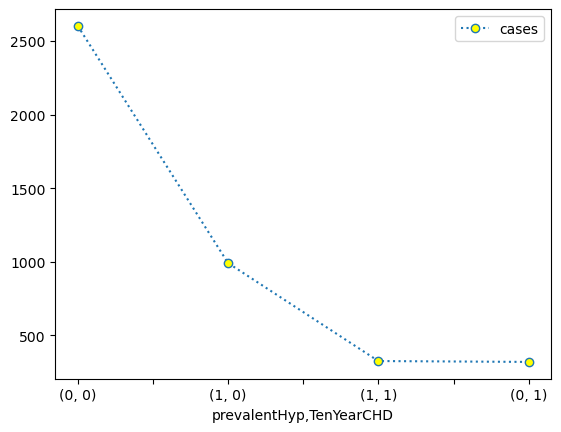

In [45]:
pd.DataFrame(df[['prevalentHyp','TenYearCHD']].value_counts(),columns=['cases']).plot(linestyle='dotted',marker='o',mfc='yellow')
plt.show()

## No any relation of prevalentHyp and heart disease.

<Axes: xlabel='BPMeds,TenYearCHD'>

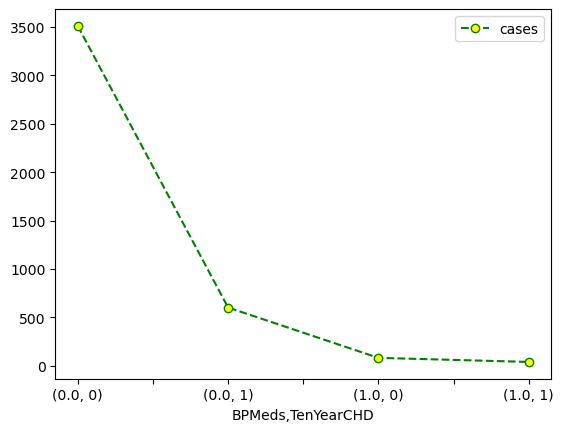

In [46]:
pd.DataFrame(df[['BPMeds','TenYearCHD']].value_counts(),columns=['cases']).plot(linestyle='dashed',marker='o',color='green',mfc='yellow')

## No any relation in BPMeds and heart disease.

# insights of dataset

## Heart disease study done on 4238 no's of peoples - Males are 43% and females are 57%.
## out of 4238 No's poeples - Heart disease cases are 644 No's- 343 No's Male and 301 No's Female - 8% male and 7% female 
## heart disease is more in male then female.
## Max heart disease cases in age - Male 50 to 52 years and female 63 to 64 years.
## Education category 1.0 having max heart disease cases.
## Male consumed more cigs per day than female
## even with less cigs consumption, female having nearly same heart disease cases. so cigs conumption affect more on male than female.
## No any relation of current smoker,prevalent stroke,prevalentHyp,BPMeds and diabeties with heart disease.
## max heart disease cases fall under cholestrol range of 220 to 260,MBI range 23.5 to 27.5, sysBP range 125 to 145.
## Max heart disease cases fall under diaBP range 80 to 90, heart rate range 73 to 76, glucose range 78 to 81.

# Building Logistic ML 

In [306]:
def fe_lr(df):
    x=df[['male','age','cigsPerDay','totChol', 'sysBP','diaBP','heartRate', 'glucose']]
    y=df['TenYearCHD']
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=2020)
    return x_train,x_test,y_train,y_test

x_train,x_test,y_train,y_test=fe_lr(df)

def lg(x_train,y_train,x_test):
    log_reg=LogisticRegression()
    log_reg.fit(x_train,y_train)
    pred=log_reg(x_test)
    return pred


def lg_val(y_test,pred):
    acc=accuracy_score(y_test,pred)
    conf=confusion_matrix(y_test,pred)
    return acc,conf


print("accurancy score is - ",round(acc*100))

accurancy score is -  86


## Above model best accuracy score is 86%, so it is applied.